# **Assigment 1**

*Nombre:* Lilian Daniela Suárez Riveros

Importación de librerias necesarias para realizar el assigment 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

**1.** Cargar en Jupyter el archivo suministrado: *covid_global.csv*.

Lectura del archivo con librería *pandas*. El archivo original se organizó en dos hojas de Excel. En una se agrupo por país y status, luego se hizó un merge para anexarle el continente. En la otra se encuentran los países con la población para el 2020, 2021 y 2022.
Cabe aclarar que se eliminaron los elementos de la variable Country Diamond Princess, MS Zaandam y Summer Olympics 2020, ya que no corresponden a países. Adicionalmente, se eliminó la latitud y longitud, ya que no serán utilizadas para el presente trabajo.

Las páginas de donde se extrajo los datos extra que se requerian son:
*   [Continentes](https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Poblacio_i_demografia/Documents_relacionats/pobest/a2016/part1/nt112.htm)
*   [Población por país](https://databank.worldbank.org/source/population-estimates-and-projections)



In [2]:
covid19 = pd.read_excel('C:/Users/Lilian/Downloads/covid19.xlsx',sheet_name = 'covid')
print(covid19.head())

       Country status Continent  01/22/20  01/23/20  01/24/20  01/25/20  \
0  Afghanistan      D    Asia           0         0         0         0   
1  Afghanistan      R    Asia           0         0         0         0   
2      Albania      D  Europa           0         0         0         0   
3      Albania      R  Europa           0         0         0         0   
4      Algeria      D  Africa           0         0         0         0   

   01/26/20  01/27/20  01/28/20  ...  01/09/22  01/10/22  01/11/22  01/12/22  \
0         0         0         0  ...      7373      7373      7374      7376   
1         0         0         0  ...         0         0         0         0   
2         0         0         0  ...      3240      3241      3247      3253   
3         0         0         0  ...         0         0         0         0   
4         0         0         0  ...      6339      6349      6363      6372   

   01/13/22  01/14/22  01/15/22  01/16/22  01/17/22  01/18/22  
0   

In [3]:
population = pd.read_excel('C:/Users/Lilian/Downloads/covid19.xlsx',sheet_name = 'population')

Dimensión del dataset leído.

In [4]:
covid19.shape

(386, 731)

In [5]:
population.shape

(193, 4)


**2.** Calcular y mostrar la cantidad de pacientes recuperados y muertos en cada continente.

Agrupación y suma de *covid19* por continent y status para la obtención de la cantidad de pacientes recuperados y muertos en cada continente. La categoría R es Recovered y D es Dead.

In [6]:
covid19.groupby(['Continent','status']).sum().sum(axis=1)

Continent  status
Africa     D           69600722
           R         1147554906
America    D          833606708
           R         7551718633
Asia       D          349263528
           R         9352273761
Europa     D          486659245
           R         5427113757
Oceania    D             814199
           R           11650490
dtype: int64


**3.** Indicar el país con el mayor crecimiento en la cantidad de recuperados y muertos durante el año 2022.

Filtro de la tabla covid19 con las fechas únicamente del 2022 para recuperados (*recovered_22*) y muertos (*dead_22*).

In [7]:
columns = covid19.columns[covid19.columns.str.endswith('22')].union(pd.Index(['Country','status']))

In [8]:
covid19_22 = covid19[columns]
covid19_22.shape

(386, 20)

In [9]:
recovered_22 = covid19_22[covid19_22.status =='R'].drop(columns = ['status'])
recovered_22.shape

(193, 19)

In [10]:
dead_22 = covid19_22[covid19_22.status =='D'].drop(columns = ['status'])
dead_22.shape

(193, 19)

Para calcular el crecimiento de cada país en recuperados o fallecidos por COVID19, se creó una matriz que indique la variación diaría que se presentó. Luego, se obtuvo el promedio entre las variaciones diarias para por país.
Para tener una aproximación del crecimiento diario teniendo en cuenta que cada país tiene una población distinta, se obtuvo cuántas personas se infectaron aproximadamente diariamente por país. 
Finalmente, para conocer cuál país tuvo el mayor crecimiento se ordeno las cantidades de mayor a menor.
A continuación, se realizan las operaciones mencionadas anteriormente.

**País con mayor crecimiento de recuperados**

Obtención de variación diaria de recuperados para el año 2022.

In [11]:
increaseR = pd.DataFrame(columns=range(18),
                  index=range(193))
for i in range(193):
  for j in range(17):
    if recovered_22.iloc[i,j] == 0 & recovered_22.iloc[i,j+1] == 0:
      increaseR.iloc[i,j] = 0
    elif recovered_22.iloc[i,j+1] != 0:
      increaseR.iloc[i,j] = (recovered_22.iloc[i,j+1]-recovered_22.iloc[i,j])/recovered_22.iloc[i,j+1]
    elif recovered_22.iloc[i,j] != 0:
      increaseR.iloc[i,j] = (recovered_22.iloc[i,j+1]-recovered_22.iloc[i,j])/recovered_22.iloc[i,j]
    increaseR.iloc[i,17] = recovered_22.Country.iloc[i]

In [12]:
increaseR.shape

(193, 18)

Cálculo del promedio de variaciones diarias por país.

In [13]:
increase_countryR22 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(193):
  increase_countryR22.iloc[i][1] = increaseR.loc[i][:17].mean()
  increase_countryR22.iloc[i][0] = increaseR.iloc[i][17]

increase_countryR22.columns = ['Country','Promedio_variacion_diario']
increase_countryR22.shape

(193, 2)

Producto de pobación y promedio de varaciones diarias por país para conocer cuántos contagiados aproximadamente hubo cada día.

In [14]:
increase_countryR22 = increase_countryR22.merge(population,how = 'left').drop(columns = ['P2020','P2021'])
Contagios = increase_countryR22.Promedio_variacion_diario*increase_countryR22.P2022
increase_countryR22 = pd.concat([increase_countryR22, Contagios],axis = 1)
increase_countryR22.columns = ['Country','Promedio_variacion_diario','P2022','Contagios']

Ordenar de mayor a menor.

In [15]:
increase_countryR22.sort_values('Contagios',ascending=False).head(5)

,Country,Promedio_variacion_diario,P2022,Contagios
0,Afghanistan,0.0,40754000,0.0
97,Lebanon,0.0,6685000,0.0
123,Netherlands,0.0,17512000,0.0
124,New Zealand,0.0,5160000,0.0
125,Nicaragua,0.0,6779000,0.0


**País con mayor crecimiento de fallecidos**

Obtención de variación diaria de fallecidos para el año 2022.

In [16]:
increaseD = pd.DataFrame(columns=range(18),
                  index=range(193))
for i in range(193):
  for j in range(17):
    if dead_22.iloc[i,j] == 0 & dead_22.iloc[i,j+1] == 0:
      increaseD.iloc[i,j] = 0
    elif dead_22.iloc[i,j+1] != 0:
      increaseD.iloc[i,j] = (dead_22.iloc[i,j+1]-dead_22.iloc[i,j])/dead_22.iloc[i,j+1]
    elif dead_22.iloc[i,j] != 0:
      increaseD.iloc[i,j] = (dead_22.iloc[i,j+1]-dead_22.iloc[i,j])/dead_22.iloc[i,j]
    increaseD.iloc[i,17] = dead_22.Country.iloc[i]

Cálculo del promedio de variaciones diarias por país.

In [17]:
increase_countryD22 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(193):
  increase_countryD22.iloc[i][1] = increaseD.loc[i][:17].mean()
  increase_countryD22.iloc[i][0] = increaseD.iloc[i][17]

increase_countryD22.columns = ['Country','Promedio_variacion_diario']
increase_countryD22.shape

(193, 2)

Producto de casos de contagio (R+D) y promedio de varaciones diarias por país para conocer cuántos contagios en hubo cada día.

In [18]:
increase_countryD22 = increase_countryD22.merge(population,how = 'left').drop(columns = ['P2020','P2021'])
Contagios = increase_countryD22.Promedio_variacion_diario*increase_countryD22.P2022
increase_countryD22 = pd.concat([increase_countryD22, Contagios],axis = 1)
increase_countryD22.columns = ['Country','Promedio_variacion_diario','P2022','Contagios']

Ordenar de mayor a menor el data frame *increase_countryD22*.

In [19]:
increase_countryD22.sort_values('Contagios',ascending=False).head(5)

,Country,Promedio_variacion_diario,P2022,Contagios
78,India,0.000659,1406632000,927291.339818
179,US,0.001868,333207000,622453.056842
188,Vietnam,0.005753,98954000,569298.763017
91,"Korea, South",0.007323,51788000,379218.053063
8,Australia,0.013454,26241000,353058.649719


**Respuesta:** En los 20 días del 2022 aún no se han recuperados, por lo que no se podría establecer el mayor crecimiento de recuperados. Sin embargo, si hay reporte de fallecidos, por lo que el país con mayor crecimiento de fallecidos es India.

**4.**Indicar el país con el menor crecimiento en la cantidad de recuperados y muertos durante el año 2021.

Filtro de la tabla covid19 con las fechas únicamente del 2021 para recuperados (*recovered_21*) y muertos (*dead_21*).

In [20]:
columns = covid19.columns[covid19.columns.str.endswith('21')].union(pd.Index(['Country','status']))
covid19_21 = covid19[columns]

In [21]:
recovered_21 = covid19_21[covid19_21.status =='R'].drop(columns = ['status'])
recovered_21.shape

(193, 366)

In [22]:
dead_21 = covid19_21[covid19_21.status =='D'].drop(columns = ['status'])
dead_21.shape

(193, 366)

Para calcular el crecimiento de cada país en recuperados o fallecidos por COVID19, se creó una matriz que indique la variación diaría que se presentó. Luego, se obtuvo el promedio entre las variaciones diarias para por país.
Para tener una aproximación del crecimiento diario teniendo en cuenta que cada país tiene una población distinta, se obtuvo cuántas personas se infectaron aproximadamente diariamente por país. 
Finalmente, para conocer cuál país tuvo el mayor crecimiento se ordeno las cantidades de mayor a menor.
A continuación, se realizan las operaciones mencionadas anteriormente.

**País con menor crecimiento de recuperados**

Obtención de variación diaria de recuperdos para el año 2021.

In [23]:
decrementR = pd.DataFrame(columns=range(364),
                  index=range(193))
for i in range(193):
  for j in range(363):
    if recovered_21.iloc[i,j] == 0 & recovered_21.iloc[i,j+1] == 0:
      decrementR.iloc[i,j] = 0
    elif recovered_21.iloc[i,j+1] != 0:
      decrementR.iloc[i,j] = (recovered_21.iloc[i,j+1]-recovered_21.iloc[i,j])/recovered_21.iloc[i,j+1]
    elif recovered_21.iloc[i,j] != 0:
      decrementR.iloc[i,j] = (recovered_21.iloc[i,j+1]-recovered_21.iloc[i,j])/recovered_21.iloc[i,j]
    decrementR.iloc[i,363] = recovered_21.Country.iloc[i]

Cálculo del promedio de variaciones diarias por país.

In [24]:
decrement_countryR21 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(193):
  decrement_countryR21.iloc[i][1] = decrementR.loc[i][:363].mean()
  decrement_countryR21.iloc[i][0] = decrementR.iloc[i][363]
  
decrement_countryR21.columns = ['Country','Promedio_variacion_diario']
decrement_countryR21.shape

(193, 2)

Producto de casos de contagio (R+D) y promedio de varaciones diarias por país para conocer cuántos contagios en hubo cada día.

In [25]:
decrement_countryR21 = decrement_countryR21.merge(population,how = 'left').drop(columns = ['P2020','P2022'])
Contagios = decrement_countryR21.Promedio_variacion_diario*decrement_countryR21.P2021
decrement_countryR21 = pd.concat([decrement_countryR21, Contagios],axis = 1)
decrement_countryR21.columns = ['Country','Promedio_variacion_diario','P2021','Contagios']

Ordenar de menor a mayor.

In [26]:
decrement_countryR21.sort_values('Contagios',ascending=True).head(5)

,Country,Promedio_variacion_diario,P2021,Contagios
36,China,-0.002487,1406537000,-3498050.683436
171,Tanzania,-0.002755,61498000,-169415.977961
131,Pakistan,-0.000626,225200000,-140926.711046
162,Spain,-0.002755,47324000,-130369.146006
127,Nigeria,-0.000569,211401000,-120346.131175


**País con menor crecimiento de fallecidos**

Obtención de variación diaria de fallecidos para el año 2021.

In [27]:
decrementD = pd.DataFrame(columns=range(364),
                  index=range(193))
for i in range(193):
  for j in range(363):
    if dead_21.iloc[i,j] == 0 & dead_21.iloc[i,j+1] == 0:
      decrementD.iloc[i,j] = 0
    elif dead_21.iloc[i,j+1] != 0:
      decrementD.iloc[i,j] = (dead_21.iloc[i,j+1]-dead_21.iloc[i,j])/dead_21.iloc[i,j+1]
    elif dead_21.iloc[i,j] != 0:
      decrementD.iloc[i,j] = (dead_21.iloc[i,j+1]-dead_21.iloc[i,j])/dead_21.iloc[i,j]
    decrementD.iloc[i,363] = dead_21.Country.iloc[i]

Cálculo del promedio de variaciones diarias por país.

In [28]:
decrement_countryD21 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(193):
  decrement_countryD21.iloc[i][1] = decrementD.loc[i][:363].mean()
  decrement_countryD21.iloc[i][0] = decrementD.iloc[i][363]
  
decrement_countryD21.columns = ['Country','Promedio_variacion_diario']
decrement_countryD21.shape

(193, 2)

Producto de casos de contagio (R+D) y promedio de varaciones diarias por país para conocer cuántos contagios en hubo cada día.

In [29]:
decrement_countryD21 = decrement_countryD21.merge(population,how = 'left').drop(columns = ['P2020','P2022'])
Contagios = decrement_countryD21.Promedio_variacion_diario*decrement_countryD21.P2021
decrement_countryD21 = pd.concat([decrement_countryD21, Contagios],axis = 1)
decrement_countryD21.columns = ['Country','Promedio_variacion_diario','P2021','Contagios']

Ordenar de menor al mayor.

In [30]:
decrement_countryD21.sort_values('Contagios',ascending=True).head(10)

,Country,Promedio_variacion_diario,P2021,Contagios
175,Tonga,0.0,107000,0.0
110,Marshall Islands,0.0,60000,0.0
147,Samoa,0.0,200000,0.0
90,Kiribati,0.0,121000,0.0
186,Vanuatu,0.0,314000,0.0
74,Holy See,0.0,825,0.0
132,Palau,0.0,18000,0.0
114,Micronesia,0.0,116000,0.0
158,Solomon Islands,0.0,704000,0.0
101,Liechtenstein,0.001222,38000,46.451492


**Respuesta:** En el 2021, el país con menor crecimiento de recuperados fue China y los de menor crecimiento de fallecidos son Tonga, Marchall Islands,Samoa. Kiribati, Vanuatu, Holy See, Palau, Micronesia, Salomon Islands y Liechtenstein.

**5.** Indicar por continente el país con mejor tasa de sobrevivientes para cada año: 2020, 2021 y 2022.

Filtración de datos para el 2020.

In [31]:
columns = covid19.columns[covid19.columns.str.endswith('20')].union(pd.Index(['Country','status']))

In [32]:
covid19_20 = covid19[columns]

In [33]:
recovered_20 = covid19_20[covid19_20.status =='R'].drop(columns = ['status'])
recovered_20 = recovered_20.reset_index().drop(columns = ['index'])
recovered_20.shape

(193, 346)

Cálculo de tasa de sobrevivientes para el 2020, 2021 y 2022.

Tasa de sobrevivientes = (Recuperados/Poblacion) *100

In [34]:
recoveredT_20 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  recoveredT_20.iloc[i][1] = recovered_20.loc[i][:345].sum()
  recoveredT_20.iloc[i][0] = recovered_20.iloc[i][345]
  
recoveredT_20.columns = ['Country','Recuperados']
recoveredT_20.shape

(193, 2)

In [35]:
recoveredT_20 = recoveredT_20.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
recoveredT_20 = recoveredT_20.merge(population,how = 'left').drop(columns = ['P2021','P2022'])
tasa_sobrevivientes = (recoveredT_20.Recuperados/recoveredT_20.P2020)*100
recoveredT_20 = pd.concat([recoveredT_20,tasa_sobrevivientes],axis = 1)
recoveredT_20.columns = ['Country','Recuperados','Continent','P2020','Tasa Sobrevivientes']

In [36]:
recovered_21 = recovered_21.reset_index().drop(columns = ['index'])
recoveredT_21 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  recoveredT_21.iloc[i][1] = recovered_21.loc[i][:365].sum()
  recoveredT_21.iloc[i][0] = recovered_21.iloc[i][365]
  
recoveredT_21.columns = ['Country','Recuperados']
recoveredT_21.shape

(193, 2)

In [37]:
recoveredT_21 = recoveredT_21.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
recoveredT_21 = recoveredT_21.merge(population,how = 'left').drop(columns = ['P2020','P2022'])
tasa_sobrevivientes = (recoveredT_21.Recuperados/recoveredT_21.P2021)*100
recoveredT_21 = pd.concat([recoveredT_21,tasa_sobrevivientes],axis = 1)
recoveredT_21.columns = ['Country','Recuperados','Continent','P2021','Tasa Sobrevivientes']

In [38]:
recovered_22 = recovered_22.reset_index().drop(columns = ['index'])
recoveredT_22 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  recoveredT_22.iloc[i][1] = recovered_22.loc[i][:18].sum()
  recoveredT_22.iloc[i][0] = recovered_22.iloc[i][18]
  
recoveredT_22.columns = ['Country','Recuperados']
recoveredT_22.shape

(193, 2)

In [39]:
recoveredT_22 = recoveredT_22.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
recoveredT_22 = recoveredT_22.merge(population,how = 'left').drop(columns = ['P2020','P2021'])
tasa_sobrevivientes = (recoveredT_22.Recuperados/recoveredT_22.P2022)*100
recoveredT_22 = pd.concat([recoveredT_22,tasa_sobrevivientes],axis = 1)
recoveredT_22.columns = ['Country','Recuperados','Continent','P2022','Tasa Sobrevivientes']

Filtración por continente para cada año.

In [40]:
continent20 = recoveredT_20[recoveredT_20.Continent == 'America'].sort_values('Tasa Sobrevivientes',ascending=False).head(1)
for i in ['Africa\xa0\xa0','Asia\xa0\xa0','Europa\xa0\xa0','Oceania']:
  continent20 = pd.concat([continent20,recoveredT_20[recoveredT_20.Continent == i].sort_values('Tasa Sobrevivientes',ascending=False).head(1)])
continent20

,Country,Recuperados,Continent,P2020,Tasa Sobrevivientes
35,Chile,84642465,America,19116209,442.778508
29,Cabo Verde,1067472,Africa,555988,191.995511
140,Qatar,24351334,Asia,2881060,845.221342
3,Andorra,553171,Europa,77265,715.939947
8,Australia,3794554,Oceania,25687041,14.77225


In [41]:
continent21 = recoveredT_21[recoveredT_21.Continent == 'America'].sort_values('Tasa Sobrevivientes',ascending=False).head(1)
for i in ['Africa\xa0\xa0','Asia\xa0\xa0','Europa\xa0\xa0','Oceania']:
  continent21 = pd.concat([continent21,recoveredT_21[recoveredT_21.Continent == i].sort_values('Tasa Sobrevivientes',ascending=False).head(1)])
continent21

,Country,Recuperados,Continent,P2021,Tasa Sobrevivientes
133,Panama,73332101,America,4382000,1673.484733
153,Seychelles,1445046,Africa,99000,1459.642424
12,Bahrain,36650701,Asia,1748000,2096.722025
3,Andorra,2532478,Europa,77000,3288.932468
8,Australia,5026540,Oceania,25967000,19.357415


In [42]:
continent22 = recoveredT_22[recoveredT_22.Continent == 'America'].sort_values('Tasa Sobrevivientes',ascending=False).head(1)
for i in ['Africa\xa0\xa0','Asia\xa0\xa0','Europa\xa0\xa0','Oceania']:
  continent22 = pd.concat([continent22,recoveredT_22[recoveredT_22.Continent == i].sort_values('Tasa Sobrevivientes',ascending=False).head(1)])
continent22

,Country,Recuperados,Continent,P2022,Tasa Sobrevivientes
5,Antigua and Barbuda,0,America,100000,0.0
2,Algeria,0,Africa,45350000,0.0
0,Afghanistan,0,Asia,40754000,0.0
1,Albania,0,Europa,2824000,0.0
8,Australia,0,Oceania,26241000,0.0


**6.** Realice un diagrama de barras (barplot) que permita visualizar la cantidad de pacientes recuperados por año para los 10 primeros paises en tasa de contagio.

Total de contagios por país para cada año.

In [43]:
covid19C20 = covid19_20.groupby(['Country'],as_index = False).sum()
covid19C21 = covid19_21.groupby(['Country'],as_index = False).sum()
covid19C22 = covid19_22.groupby(['Country'],as_index = False).sum()

In [44]:
covid19CT = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  covid19CT.iloc[i][1] = covid19C20.loc[i][1:729].sum()
  covid19CT.iloc[i][0] = covid19C20.Country[i]
covid19CT.columns = ['Country','TotalContagios']
covid19C20 = covid19CT 

In [45]:
covid19CT = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  covid19CT.iloc[i][1] = covid19C21.loc[i][1:729].sum()
  covid19CT.iloc[i][0] = covid19C21.Country[i]
covid19CT.columns = ['Country','TotalContagios']
covid19C21 = covid19CT 

In [46]:
covid19CT = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  covid19CT.iloc[i][1] = covid19C22.loc[i][1:729].sum()
  covid19CT.iloc[i][0] = covid19C22.Country[i]
covid19CT.columns = ['Country','TotalContagios']
covid19C22 = covid19CT 

Generación de Data Frame con recuperados de los 10 países con tasa de contagio.

Tasa de contagio = (Recuperados + Fallecidos)/Poblacion *100

In [47]:
covid19C20 = covid19C20.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
covid19C20 = covid19C20.merge(population,how = 'left').drop(columns = ['P2022','P2021'])
tasa_contagios = (covid19C20.TotalContagios/covid19C20.P2020)*100
covid19C20 = pd.concat([covid19C20,tasa_contagios],axis = 1)
covid19C20.columns = ['Country','TotalContagios','Continent','P2022','Tasa Contagios']
covid19C20 = covid19C20.sort_values('Tasa Contagios',ascending=False).head(10).merge(recoveredT_20.loc[:,['Country','Recuperados']],how = 'left')
covid19C20 = covid19C20.loc[:,['Country','Recuperados']]

In [48]:
covid19C21 = covid19C21.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
covid19C21 = covid19C21.merge(population,how = 'left').drop(columns = ['P2022','P2020'])
tasa_contagios = (covid19C21.TotalContagios/covid19C21.P2021)*100
covid19C21 = pd.concat([covid19C21,tasa_contagios],axis = 1)
covid19C21.columns = ['Country','TotalContagios','Continent','P2021','Tasa Contagios']
covid19C21 = covid19C21.sort_values('Tasa Contagios',ascending=False).head(10).merge(recoveredT_21.loc[:,['Country','Recuperados']],how = 'left')
covid19C21 = covid19C21.loc[:,['Country','Recuperados']]

In [49]:
covid19C22 = covid19C22.merge(covid19.loc[:, ['Country','Continent']].drop_duplicates(),how = 'left')
covid19C22 = covid19C22.merge(population,how = 'left').drop(columns = ['P2021','P2020'])
tasa_contagios = (covid19C22.TotalContagios/covid19C22.P2022)*100
covid19C22 = pd.concat([covid19C22,tasa_contagios],axis = 1)
covid19C22.columns = ['Country','TotalContagios','Continent','P2022','Tasa Contagios']
covid19C22 = covid19C22.sort_values('Tasa Contagios',ascending=False).head(10).merge(recoveredT_22.loc[:,['Country','Recuperados']],how = 'left')
covid19C22 = covid19C22.loc[:,['Country','Recuperados']]

Barplot para la cantidad de pacientes recuperados por año de los 10 primeros paises en tasa de contagio.

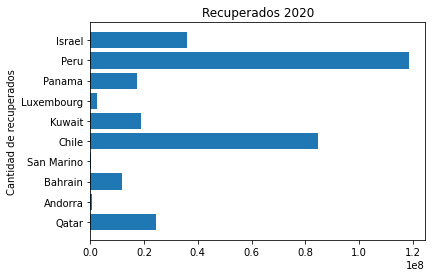

In [50]:
plt.barh(covid19C20.Country,covid19C20.Recuperados)
plt.ylabel('Cantidad de recuperados')
plt.title('Recuperados 2020')
plt.show()

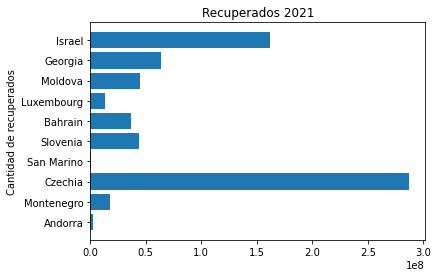

In [51]:
plt.barh(covid19C21.Country,covid19C21.Recuperados)
plt.ylabel('Cantidad de recuperados')
plt.title('Recuperados 2021')
plt.show()

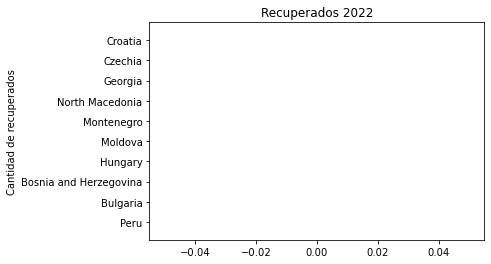

In [52]:
plt.barh(covid19C22.Country,covid19C22.Recuperados)
plt.ylabel('Cantidad de recuperados')
plt.title('Recuperados 2022')
plt.show()

**7.** Realice un diagrama de barras(barplot)que permita visualizar la cantidad de pacientes fallecidos por año para los 10 primeros paises en tasa de contagio.

In [53]:
dead_20 = covid19_20[covid19_20.status =='D'].drop(columns = ['status'])
dead_20 = dead_20.reset_index().drop(columns = ['index'])
dead_20.shape

(193, 346)

In [54]:
deadT_20 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  deadT_20.iloc[i][1] = dead_20.loc[i][:345].sum()
  deadT_20.iloc[i][0] = dead_20.iloc[i][345]
  
deadT_20.columns = ['Country','Fallecidos']
deadT_20.shape

(193, 2)

In [55]:
dead_21 = dead_21.reset_index().drop(columns = ['index'])
deadT_21 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  deadT_21.iloc[i][1] = dead_21.loc[i][:365].sum()
  deadT_21.iloc[i][0] = dead_21.iloc[i][365]
  
deadT_21.columns = ['Country','Fallecidos']
deadT_21.shape

(193, 2)

In [56]:
dead_22 = dead_22.reset_index().drop(columns = ['index'])
deadT_22 = pd.DataFrame(columns=range(2),
                  index=range(193))
for i in range(0,193):
  deadT_22.iloc[i][1] = dead_22.loc[i][1:18].sum()
  deadT_22.iloc[i][0] = dead_22.iloc[i][18]
  
deadT_22.columns = ['Country','Fallecidos']
deadT_22.shape

(193, 2)

In [57]:
dead20 = deadT_20[deadT_20.Country.isin(covid19C20.Country)]
dead21 = deadT_21[deadT_21.Country.isin(covid19C21.Country)]
dead22 = deadT_22[deadT_22.Country.isin(covid19C22.Country)]

Barplot para la cantidad de pacientes fallecidos por año de los 10 primeros paises en tasa de contagio.

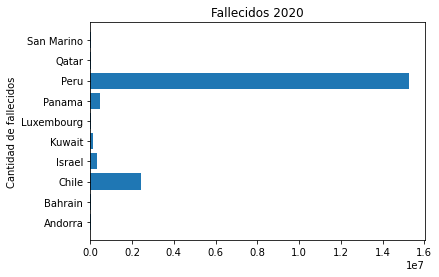

In [58]:
plt.barh(dead20.Country,dead20.Fallecidos)
plt.ylabel('Cantidad de fallecidos')
plt.title('Fallecidos 2020')
plt.show()

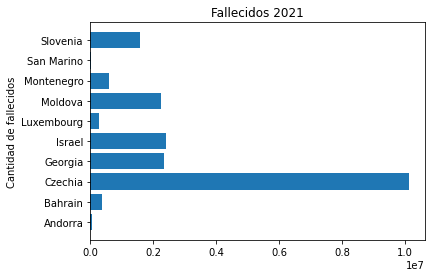

In [59]:
plt.barh(dead21.Country,dead21.Fallecidos)
plt.ylabel('Cantidad de fallecidos')
plt.title('Fallecidos 2021')
plt.show()

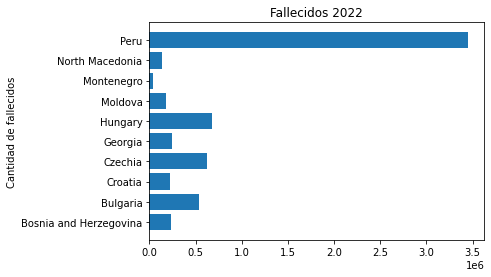

In [60]:
plt.barh(dead22.Country,dead22.Fallecidos)
plt.ylabel('Cantidad de fallecidos')
plt.title('Fallecidos 2022')
plt.show()


**8.** Realice un diagrama de caja (boxplot) con las cifras de los tres años para Colombia, para pacientes recuperados y muertos. ¿Cuál es su interpretación a lo visualizado en el gráfico?

Se filtro la información para Colombia para cada año.


In [61]:
covid19_Colombia20 = covid19_20[covid19_20.Country == 'Colombia'].drop(columns = ['Country','status']).T
covid19_Colombia20.columns = ['D','R']
covid19_Colombia20

,D,R
01/22/20,0,0
01/23/20,0,0
01/24/20,0,0
01/25/20,0,0
01/26/20,0,0
...,...,...
12/27/20,42171,1455975
12/28/20,42374,1469041
12/29/20,42620,1483017
12/30/20,42909,1497180


In [62]:
covid19_Colombia21 = covid19_21[covid19_21.Country == 'Colombia'].drop(columns = ['Country','status']).T
covid19_Colombia21.columns = ['D','R']
covid19_Colombia21

,D,R
01/01/21,43495,1520548
01/02/21,43765,1530973
01/03/21,43965,1542353
01/04/21,44187,1552179
01/05/21,44428,1559010
...,...,...
12/27/21,129798,0
12/28/21,129833,0
12/29/21,129866,0
12/30/21,129901,0


In [63]:
covid19_Colombia22 = covid19_22[covid19_22.Country == 'Colombia'].drop(columns = ['Country','status']).T
covid19_Colombia22.columns = ['D','R']
covid19_Colombia22

,D,R
01/01/22,129986,0
01/02/22,130026,0
01/03/22,130061,0
01/04/22,130100,0
01/05/22,130140,0
01/06/22,130191,0
01/07/22,130250,0
01/08/22,130288,0
01/09/22,130338,0
01/10/22,130395,0


Se gráfico los boxplot pedidos.

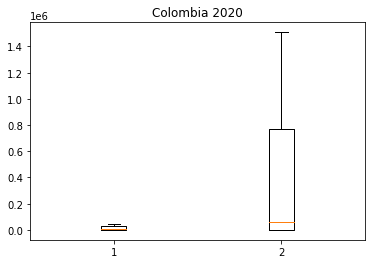

In [64]:
plt.boxplot(covid19_Colombia20)
plt.title("Colombia 2020")
plt.show()

**Interpretación:** 


*   La distribución de fallecidos y recuperados por Covid 19 están sesgadas positivamente, es decir, en ambos casos los valores se concentrar en la parte inferior.
*   Los datos están menos dispersos para los fallecidos por Covid 19 que para los recuperados por Covid 19.
*   La mediana de recuperados y fallecidos son cercanas. 
*   La mayoría de los sujetos recuperados en los días están entre 0 y 800.000, pero algunos días tienen recuperados que son tan altos como 1.500.000

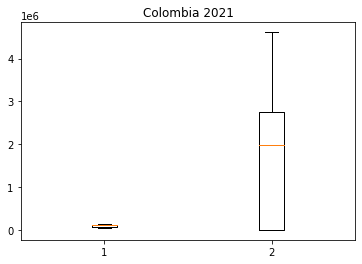

In [65]:
plt.boxplot(covid19_Colombia21)
plt.title("Colombia 2021")
plt.show()

**Interpretación:** 


*   La distribución de fallecidos y recuperados por Covid 19 están sesgada negativamente, es decir, en ambos casos los valores se concentrar en la parte superior.
*   Los datos están menos dispersos para los fallecidos por Covid 19 que para los recuperados por Covid 19.
*   La mediana de recuperados y fallecidos son lejanas.
*   La mayoría de los sujetos recuperados en los días están entre 0 y 2.800.000, pero algunos días tienen recuperados que son tan altos como 4.800.000

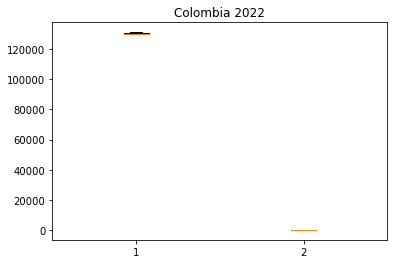

In [66]:
plt.boxplot(covid19_Colombia22)
plt.title("Colombia 2022")
plt.show()

**Interpretación:** 

*   Los datos están menos dispersos para los fallecidos por Covid 19 que para los recuperados por Covid 19, porque no se han presentado casos de recuperación en el 2022.


**9.** Para cada una de las variables muestre el consolidado de la siguiente información: valor mínimo, primer cuartil, promedio, tercer cuartil y valor máximo. Recuerde se requiere para cada variable numérica.

In [67]:
covid19_desc = covid19.drop(columns = ['Country','Continent'])

In [68]:
recovered = covid19_desc[covid19_desc.status =='R']

In [69]:
dead = covid19_desc[covid19_desc.status =='D']

In [70]:
recovered.describe() 

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,01/09/22,01/10/22,01/11/22,01/12/22,01/13/22,01/14/22,01/15/22,01/16/22,01/17/22,01/18/22
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0
mean,0.155440,0.165803,0.202073,0.217617,0.290155,0.336788,0.559585,0.658031,0.751295,1.165803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.019871,2.163492,2.599198,2.814453,3.551519,4.195179,7.280670,8.646239,9.728090,15.411490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,28.000000,30.000000,36.000000,39.000000,49.000000,58.000000,101.000000,120.000000,135.000000,214.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
dead.describe() 

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,01/09/22,01/10/22,01/11/22,01/12/22,01/13/22,01/14/22,01/15/22,01/16/22,01/17/22,01/18/22
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.088083,0.093264,0.134715,0.217617,0.290155,0.424870,0.678756,0.689119,0.886010,1.103627,...,28447.787565,28481.124352,28524.134715,28571.989637,28609.352332,28652.316062,28683.238342,28704.564767,28737.025907,28781.196891
std,1.223687,1.295668,1.871521,3.023226,4.030968,5.902489,9.429586,9.573549,12.308849,15.332075,...,91452.106906,91566.987359,91709.261108,91877.330134,92000.079335,92153.579710,92232.976628,92289.124961,92374.310766,92511.975495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,361.000000,364.000000,366.000000,368.000000,370.000000,370.000000,371.000000,371.000000,371.000000,371.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2991.000000,2991.000000,2991.000000,2992.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2995.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14911.000000,14915.000000,14927.000000,14935.000000,14945.000000,14954.000000,14963.000000,14976.000000,14994.000000,15012.000000
max,17.000000,18.000000,26.000000,42.000000,56.000000,82.000000,131.000000,133.000000,171.000000,213.000000,...,838768.000000,840627.000000,842924.000000,845392.000000,847273.000000,849580.000000,850383.000000,850931.000000,852062.000000,853958.000000
